### Logistic Regression Task
- 기계 센서 데이터를 통해 기계 고장 여부를 예측하는 분류기를 모델화한다.

In [1]:
import pandas as pd
import numpy as np

# 데이터 세트 불러오기
m_df = pd.read_csv('./datasets/machine.csv')
m_df

,Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Machine failure
0,1551,42.8,0,0,0,0,0,0
1,1408,46.3,3,0,0,0,0,0
2,1498,49.4,5,0,0,0,0,0
3,1433,39.5,7,0,0,0,0,0
4,1408,40.0,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
9810,1604,29.5,14,0,0,0,0,0
9811,1632,31.8,17,0,0,0,0,0
9812,1645,33.4,22,0,0,0,0,0
9813,1408,48.5,25,0,0,0,0,0


In [2]:
# 데이터 세트 정보 출력
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rotational speed [rpm]  9815 non-null   int64  
 1   Torque [Nm]             9815 non-null   float64
 2   Tool wear [min]         9815 non-null   int64  
 3   TWF                     9815 non-null   int64  
 4   HDF                     9815 non-null   int64  
 5   PWF                     9815 non-null   int64  
 6   OSF                     9815 non-null   int64  
 7   Machine failure         9815 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 613.6 KB


In [3]:
# 결측치 검사
m_df.isna().sum()

Rotational speed [rpm]    0
Torque [Nm]               0
Tool wear [min]           0
TWF                       0
HDF                       0
PWF                       0
OSF                       0
Machine failure           0
dtype: int64

In [4]:
# 중복 검사
m_df.duplicated().sum()

6

In [5]:
# 중복 데이터를 제거한 새로운 데이터 세트 생성 후 인덱스 초기화
pre_m_df = m_df.drop_duplicates()
pre_m_df = pre_m_df.reset_index(drop=True)
pre_m_df

,Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Machine failure
0,1551,42.8,0,0,0,0,0,0
1,1408,46.3,3,0,0,0,0,0
2,1498,49.4,5,0,0,0,0,0
3,1433,39.5,7,0,0,0,0,0
4,1408,40.0,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
9804,1634,27.9,12,0,0,0,0,0
9805,1604,29.5,14,0,0,0,0,0
9806,1632,31.8,17,0,0,0,0,0
9807,1645,33.4,22,0,0,0,0,0


In [6]:
# target의 데이터 분포 출력
pre_m_df['Machine failure'].value_counts()

Machine failure
0    9523
1     286
Name: count, dtype: int64

array([[<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>],
       [<Axes: title={'center': 'TWF'}>, <Axes: title={'center': 'HDF'}>,
        <Axes: title={'center': 'PWF'}>],
       [<Axes: title={'center': 'OSF'}>,
        <Axes: title={'center': 'Machine failure'}>, <Axes: >]],
      dtype=object)

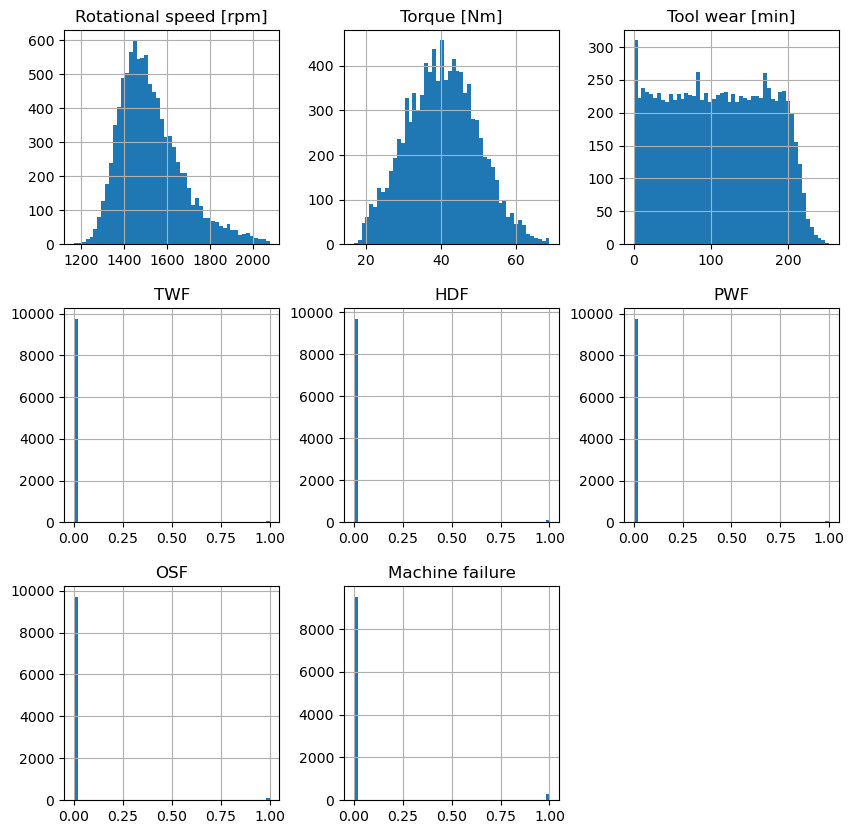

In [7]:
# 각 컬럼의 데이터 분포를 히스토그램으로 시각화
pre_m_df.hist(figsize=(10, 10), bins=50)

#### 중간 분석
- 현재 target(Machine Failure) 데이터의 클래스 간 불균형이 심각함에 따라, 언더 샘플링부터 진행

### 언더 샘플링

In [8]:
# target 값이 0인 데이터는 언더 샘플링하고, target이 1인 데이터는 그대로 각각 새로운 데이터 세트에 할당
normal_df = pre_m_df[pre_m_df['Machine failure'] == 0].sample(286, random_state=124)
abnormal_df = pre_m_df[pre_m_df['Machine failure'] == 1]

# 두 데이터 세트 병합 후 인덱스 초기화
pre_m_df = pd.concat([normal_df, abnormal_df]).reset_index(drop=True)
pre_m_df

,Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Machine failure
0,1527,45.3,8,0,0,0,0,0
1,1524,40.4,131,0,0,0,0,0
2,1594,35.5,13,0,0,0,0,0
3,1671,31.8,108,0,0,0,0,0
4,1356,48.3,36,0,0,0,0,0
...,...,...,...,...,...,...,...,...
567,1352,48.9,238,0,0,0,1,1
568,1294,66.7,12,0,0,1,0,1
569,1360,60.9,187,0,0,0,1,1
570,1337,56.1,206,0,0,0,1,1


In [9]:
# 현재 target의 데이터 분포 출력
pre_m_df['Machine failure'].value_counts()

Machine failure
0    286
1    286
Name: count, dtype: int64

array([[<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>],
       [<Axes: title={'center': 'TWF'}>, <Axes: title={'center': 'HDF'}>,
        <Axes: title={'center': 'PWF'}>],
       [<Axes: title={'center': 'OSF'}>,
        <Axes: title={'center': 'Machine failure'}>, <Axes: >]],
      dtype=object)

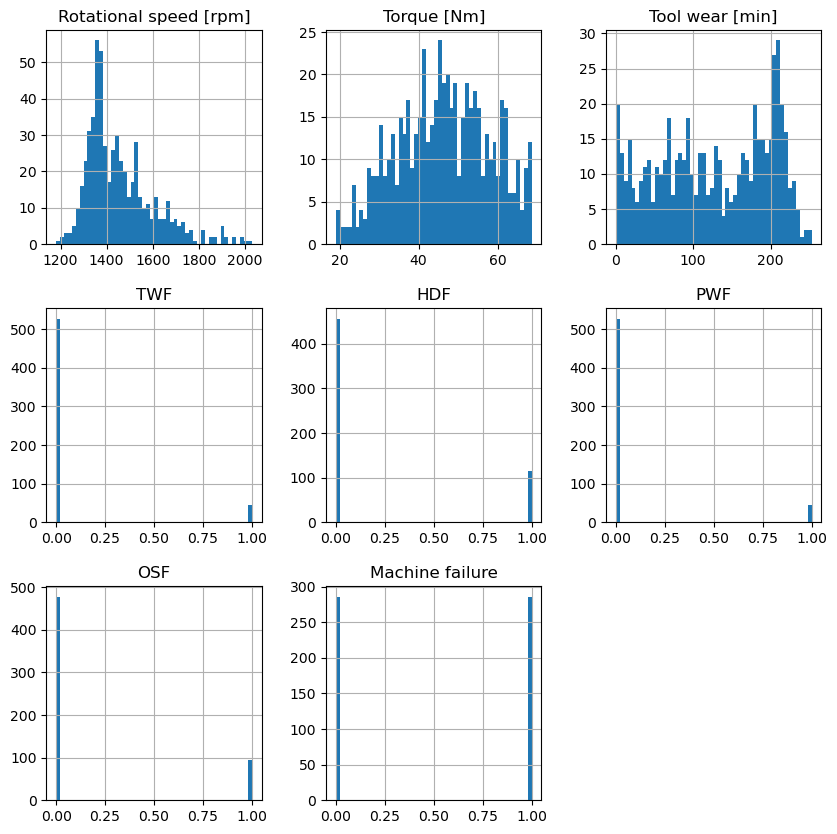

In [10]:
# 각 컬럼의 데이터 분포를 히스토그램으로 시각화
pre_m_df.hist(figsize=(10, 10), bins=50)

### Pytorch를 이용한 로지스틱 회귀

In [11]:
import torch
from torch.nn import Sequential, Linear, Sigmoid
from torch.optim import SGD
from torch.nn.functional import binary_cross_entropy
from sklearn.model_selection import train_test_split
import numpy as np

# torch의 시드값 고정
torch.manual_seed(124)

# 데이터 세트 분할
features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
                train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# 분할한 데이터 세트들을 Tensor 타입으로 변경
# y(정답) 데이터 세트들은 ndarray 타입이기 때문에 view를 사용해서 차원 변환
X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

# 이전 과정의 출력이 다음 과정의 입력이 된다
logistic_r = Sequential(
    Linear(7, 1), # 7개의 input을 통해 결과 출력
    Sigmoid(), # 위 결과에 Sigmoid 적용
)

optimizer = SGD(logistic_r.parameters(), lr=1e-3)

# 반복 횟수
epochs = 100000

for epoch in range(1, epochs + 1):
    H = logistic_r(X_train)
    loss = binary_cross_entropy(H, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10000 == 0:
        print(f'Epoch: {epoch}/{epochs}')
        for i, w in enumerate(list(logistic_r.parameters())[0][0]):
            print(f'W{i + 1}: {np.round(w.item(), 4)}, ', end='')
        print(f'b: {np.round(list(logistic_r.parameters())[1].item(), 4)}')
        print(f'loss: {np.round(loss.item(), 4)}')

Epoch: 10000/100000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0253
loss: 50.1094
Epoch: 20000/100000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0253
loss: 50.1094
Epoch: 30000/100000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0253
loss: 50.1094
Epoch: 40000/100000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0253
loss: 50.1094
Epoch: 50000/100000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0253
loss: 50.1094
Epoch: 60000/100000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0253
loss: 50.1094
Epoch: 70000/100000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196, W5: 0.0093, W6: -0.2849, W7: -0.1438, b: -0.0253
loss: 50.1094
Epoch: 80000/100000
W1: -0.2626, W2: 0.0991, W3: 0.2575, W4: -0.0196,

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 분류 모델의 평가 지표를 출력하고, 분류기와 문제(X_test)를 전달받으면 오차 행렬도 시각화 해주는 함수
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [13]:
# 모델 평가
get_evaluation(y_test.detach(), logistic_r(X_test) >= 0.5)

오차 행렬
[[58  0]
 [57  0]]
정확도: 0.5043, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000, ROC-AUC: 0.5000
################################################################################


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Sklearn의 LogisticRegression을 이용한 로지스틱 회귀

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 데이터 세트 분할
features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
                train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# 일반적으로 데이터 세트가 작은 경우에는 liblinear가, 큰 경우에는 sag, saga의 성능이 더 좋다
# 다중 분류는 'newton-cg', 'sag', 'saga', 'lbfgs'만 처리할 수 있다.
# C값이 작아질수록 규제가 커진다
logistic_r = LogisticRegression(solver='liblinear', penalty='l2', C=0.05, random_state=124)
logistic_r.fit(X_train, y_train)

# 훈련 후 테스트 데이터 예측
prediction = logistic_r.predict(X_test)

오차 행렬
[[50  8]
 [ 8 49]]
정확도: 0.8609, 정밀도: 0.8596, 재현율: 0.8596, F1: 0.8596, ROC-AUC: 0.8609
################################################################################


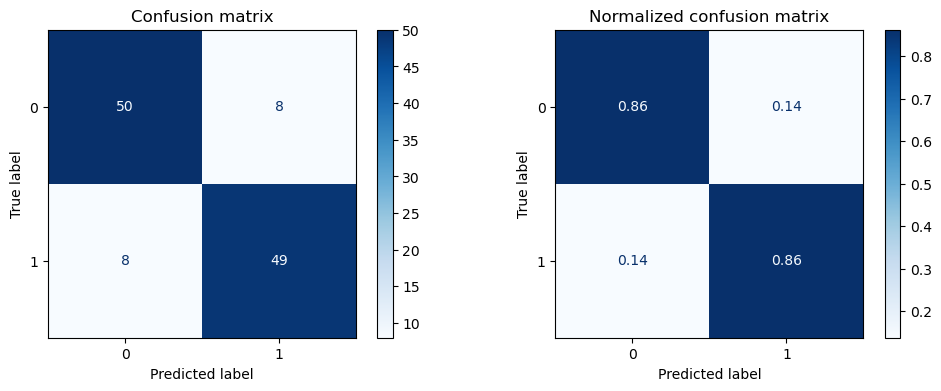

In [15]:
# 모델 평가
get_evaluation(y_test, prediction, logistic_r, X_test)

### 추가 전처리 후 재학습

#### OLS 평가

In [16]:
from statsmodels.api import OLS

features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

# 현재 데이터의 OLS 평가
model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:        Machine failure   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              974.9
Date:                Wed, 08 May 2024   Prob (F-statistic):                   1.25e-310
Time:                        16:42:53   Log-Likelihood:                          121.91
No. Observations:                 572   AIC:                                     -229.8
Df Residuals:                     565   BIC:                                     -199.4
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

#### VIF Score 출력

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# feature 별 VIF Score를 출력해주는 함수
def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [18]:
# feature 별 VIF Score 출력
get_vif(features)

,vif_score,feature
0,17.292064,Rotational speed [rpm]
1,20.942339,Torque [Nm]
2,7.262241,Tool wear [min]
3,1.424932,TWF
4,1.822451,HDF
5,1.543529,PWF
6,2.504618,OSF


#### 각 feature의 중요도 출력

In [19]:
pre_m_df.corr()['Machine failure'].sort_values(ascending=False)[1:]

Torque [Nm]               0.586769
HDF                       0.501638
OSF                       0.443455
Tool wear [min]           0.335155
TWF                       0.288675
PWF                       0.288675
Rotational speed [rpm]   -0.510421
Name: Machine failure, dtype: float64

#### feature 간 상관관계 출력

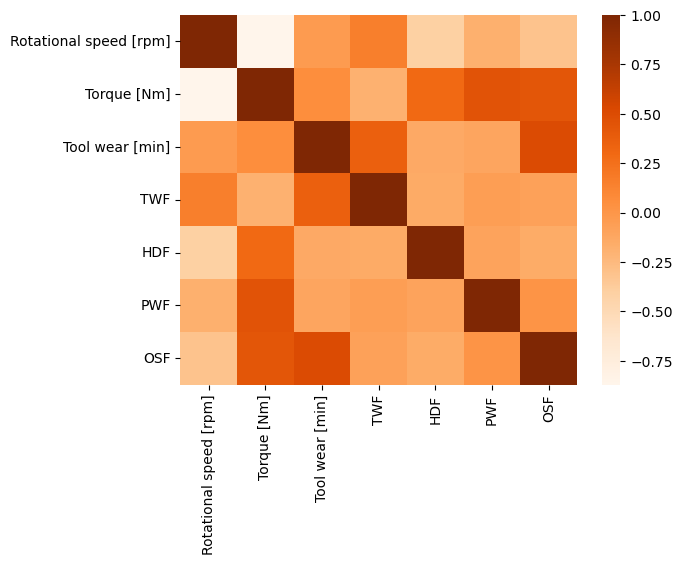

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(features.corr(), cmap='Oranges')
plt.show()

In [21]:
features.corr()

,Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF
Rotational speed [rpm],1.000000,-0.871437,-0.033014,0.155094,-0.408902,-0.182534,-0.312854
Torque [Nm],-0.871437,1.000000,0.061241,-0.188613,0.293810,0.455115,0.435328
Tool wear [min],-0.033014,0.061241,1.000000,0.362452,-0.134125,-0.110563,0.508124
TWF,0.155094,-0.188613,0.362452,1.000000,-0.144811,-0.058712,-0.074902
HDF,-0.408902,0.293810,-0.134125,-0.144811,1.000000,-0.095701,-0.151829
PWF,-0.182534,0.455115,-0.110563,-0.058712,-0.095701,1.000000,0.013619
OSF,-0.312854,0.435328,0.508124,-0.074902,-0.151829,0.013619,1.000000


#### 중간 분석
- Rotational speed와 Torque 사이에 강한 음의 상관관계 발견
- 또한 Tool Ware는 다른 feature들에 비해 target에 미치는 영향이 적은 것으로 확인

In [22]:
# Tool Ware 제거
pre_m_df = pre_m_df.drop(labels=['Tool wear [min]', 'Rotational speed [rpm]'], axis=1)
pre_m_df

,Torque [Nm],TWF,HDF,PWF,OSF,Machine failure
0,45.3,0,0,0,0,0
1,40.4,0,0,0,0,0
2,35.5,0,0,0,0,0
3,31.8,0,0,0,0,0
4,48.3,0,0,0,0,0
...,...,...,...,...,...,...
567,48.9,0,0,0,1,1
568,66.7,0,0,1,0,1
569,60.9,0,0,0,1,1
570,56.1,0,0,0,1,1


#### VIF Score 출력

In [23]:
features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

# feature 별 VIF Score 출력
get_vif(features)

,vif_score,feature
0,2.450382,Torque [Nm]
1,1.099205,TWF
2,1.527895,HDF
3,1.237154,PWF
4,1.446311,OSF


#### 각 feature의 중요도 출력

In [24]:
pre_m_df.corr()['Machine failure'].sort_values(ascending=False)[1:]

Torque [Nm]    0.586769
HDF            0.501638
OSF            0.443455
TWF            0.288675
PWF            0.288675
Name: Machine failure, dtype: float64

#### feature 간 상관관계 출력

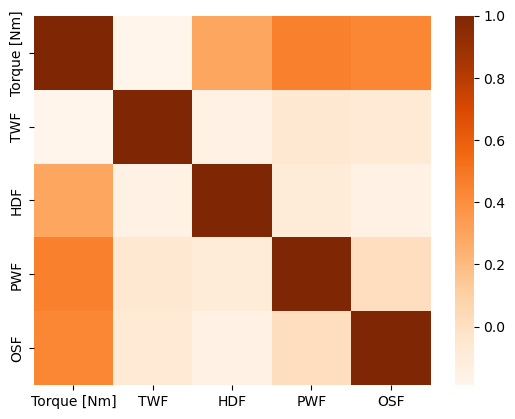

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(features.corr(), cmap='Oranges')
plt.show()

In [26]:
features.corr()

,Torque [Nm],TWF,HDF,PWF,OSF
Torque [Nm],1.000000,-0.188613,0.293810,0.455115,0.435328
TWF,-0.188613,1.000000,-0.144811,-0.058712,-0.074902
HDF,0.293810,-0.144811,1.000000,-0.095701,-0.151829
PWF,0.455115,-0.058712,-0.095701,1.000000,0.013619
OSF,0.435328,-0.074902,-0.151829,0.013619,1.000000


#### OLS 평가

In [27]:
from statsmodels.api import OLS

features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

# 현재 데이터의 OLS 평가
model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:        Machine failure   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              1350.
Date:                Wed, 08 May 2024   Prob (F-statistic):                   4.45e-312
Time:                        16:44:58   Log-Likelihood:                          117.99
No. Observations:                 572   AIC:                                     -226.0
Df Residuals:                     567   BIC:                                     -204.2
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

### Pytorch를 이용한 로지스틱 회귀

In [55]:
import torch
from torch.nn import Sequential, Linear, Sigmoid
from torch.optim import SGD
from torch.nn.functional import binary_cross_entropy
from sklearn.model_selection import train_test_split
import numpy as np

# torch의 시드값 고정
torch.manual_seed(124)

# 데이터 세트 분할
features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
                train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# 분할한 데이터 세트들을 Tensor 타입으로 변경
# y(정답) 데이터 세트들은 ndarray 타입이기 때문에 view를 사용해서 차원 변환
X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

# 이전 과정의 출력이 다음 과정의 입력이 된다
logistic_r = Sequential(
    Linear(5, 1), # 5개의 input을 통해 결과 출력
    Sigmoid(), # 위 결과에 Sigmoid 적용
)

optimizer = SGD(logistic_r.parameters(), lr=0.00005)

# 반복 횟수
epochs = 100000

for epoch in range(1, epochs + 1):
    H = logistic_r(X_train)
    loss = binary_cross_entropy(H, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10000 == 0:
        print(f'Epoch: {epoch}/{epochs}')
        for i, w in enumerate(list(logistic_r.parameters())[0][0]):
            print(f'W{i + 1}: {np.round(w.item(), 4)}, ', end='')
        print(f'b: {np.round(list(logistic_r.parameters())[1].item(), 4)}')
        print(f'loss: {np.round(loss.item(), 4)}')

Epoch: 10000/100000
W1: 0.0115, W2: 0.1323, W3: 0.3432, W4: -0.0081, W5: 0.0465, b: -0.3618
loss: 0.6249
Epoch: 20000/100000
W1: 0.0118, W2: 0.1469, W3: 0.3797, W4: 0.0063, W5: 0.0804, b: -0.3928
loss: 0.6172
Epoch: 30000/100000
W1: 0.012, W2: 0.1615, W3: 0.4156, W4: 0.0207, W5: 0.1139, b: -0.4234
loss: 0.6096
Epoch: 40000/100000
W1: 0.0123, W2: 0.1761, W3: 0.4509, W4: 0.0349, W5: 0.147, b: -0.4537
loss: 0.6023
Epoch: 50000/100000
W1: 0.0126, W2: 0.1907, W3: 0.4859, W4: 0.0491, W5: 0.1796, b: -0.4835
loss: 0.5951
Epoch: 60000/100000
W1: 0.0129, W2: 0.2055, W3: 0.5203, W4: 0.0633, W5: 0.2118, b: -0.5129
loss: 0.5881
Epoch: 70000/100000
W1: 0.0131, W2: 0.2202, W3: 0.5543, W4: 0.0773, W5: 0.2436, b: -0.542
loss: 0.5812
Epoch: 80000/100000
W1: 0.0134, W2: 0.235, W3: 0.5877, W4: 0.0912, W5: 0.275, b: -0.5706
loss: 0.5746
Epoch: 90000/100000
W1: 0.0137, W2: 0.2497, W3: 0.6208, W4: 0.1051, W5: 0.306, b: -0.5989
loss: 0.568
Epoch: 100000/100000
W1: 0.0139, W2: 0.2643, W3: 0.6534, W4: 0.1189, W

In [56]:
# 모델 평가
get_evaluation(y_test.detach(), logistic_r(X_test) >= 0.5)

오차 행렬
[[42 16]
 [ 2 55]]
정확도: 0.8435, 정밀도: 0.7746, 재현율: 0.9649, F1: 0.8594, ROC-AUC: 0.8445
################################################################################


### Sklearn의 LogisticRegression을 이용한 로지스틱 회귀

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 데이터 세트 분할
features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
                train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# 일반적으로 데이터 세트가 작은 경우에는 liblinear가, 큰 경우에는 sag, saga의 성능이 더 좋다
# 다중 분류는 'newton-cg', 'sag', 'saga', 'lbfgs'만 처리할 수 있다.
# C값이 작아질수록 규제가 커진다
logistic_r = LogisticRegression(solver='liblinear', penalty='l2', C=0.018, random_state=124)
logistic_r.fit(X_train, y_train)

# 훈련 후 테스트 데이터 예측
prediction = logistic_r.predict(X_test)

오차 행렬
[[42 16]
 [ 1 56]]
정확도: 0.8522, 정밀도: 0.7778, 재현율: 0.9825, F1: 0.8682, ROC-AUC: 0.8533
################################################################################


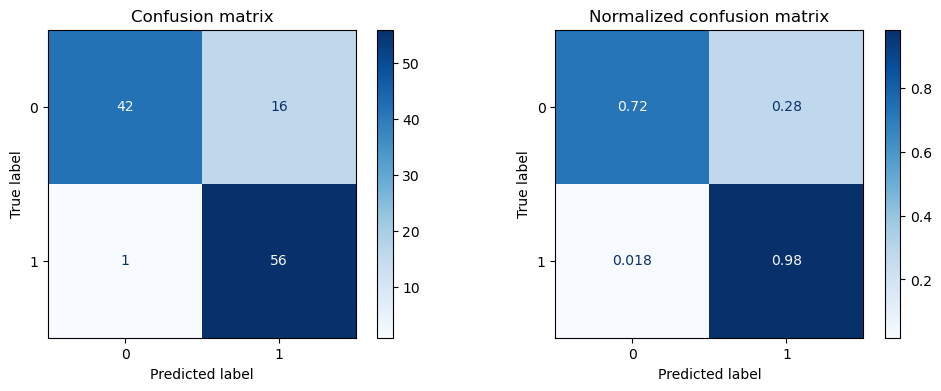

In [61]:
# 모델 평가
get_evaluation(y_test, prediction, logistic_r, X_test)

In [64]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test , prediction_proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, prediction_proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

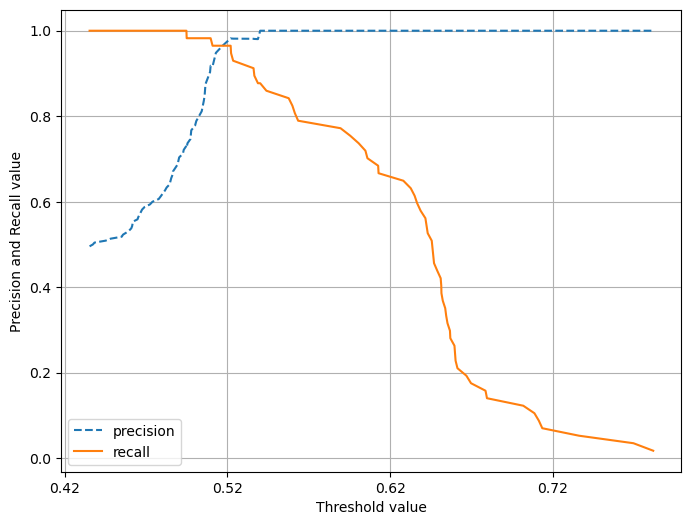

In [65]:
precision_recall_curve_plot(y_test, logistic_r.predict_proba(X_test)[:, 1])

In [67]:
_, _, thresholds = precision_recall_curve(y_test, logistic_r.predict_proba(X_test)[:, 1])
thresholds

array([0.43531404, 0.43733199, 0.43834175, 0.44517059, 0.44821245,
       0.45507048, 0.45583358, 0.45786953, 0.45965214, 0.46092607,
       0.46143579, 0.46169068, 0.46194558, 0.46475086, 0.46526116,
       0.46602673, 0.46679247, 0.46755837, 0.46909061, 0.47241244,
       0.47394643, 0.47778351, 0.47906314, 0.4816232 , 0.48264751,
       0.48444038, 0.48495271, 0.48546507, 0.48623366, 0.48648988,
       0.48930866, 0.48982124, 0.49033384, 0.4926408 , 0.49315351,
       0.49479109, 0.49494808, 0.49546083, 0.49725556, 0.49751196,
       0.49776836, 0.50007597, 0.50084518, 0.50417833, 0.50546023,
       0.50597297, 0.50622934, 0.5064857 , 0.50930542, 0.5096611 ,
       0.51084322, 0.51289329, 0.51699206, 0.52195554, 0.52221145,
       0.52349079, 0.53600941, 0.53651952, 0.53871525, 0.54008809,
       0.54390699, 0.55760919, 0.55988496, 0.56140075, 0.56342001,
       0.58944267, 0.59538605, 0.60056373, 0.60473883, 0.60596393,
       0.61255613, 0.61279952, 0.62802098, 0.6325618 , 0.63494

In [70]:
from sklearn.preprocessing import Binarizer
def get_evaluation_by_thresholds(y_test, prediction_proba_class1, thresholds):
    
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold).fit(prediction_proba_class1) 
        custom_prediction = binarizer.transform(prediction_proba_class1)
        print('임계치:', threshold)
        get_evaluation(y_test, custom_prediction)

In [71]:
get_evaluation_by_thresholds(y_test, logistic_r.predict_proba(X_test)[:, 1].reshape(-1, 1), thresholds)

임계치: 0.43531403563198307
오차 행렬
[[ 1 57]
 [ 0 57]]
정확도: 0.5043, 정밀도: 0.5000, 재현율: 1.0000, F1: 0.6667, ROC-AUC: 0.5086
################################################################################
임계치: 0.43733199177801657
오차 행렬
[[ 2 56]
 [ 0 57]]
정확도: 0.5130, 정밀도: 0.5044, 재현율: 1.0000, F1: 0.6706, ROC-AUC: 0.5172
################################################################################
임계치: 0.4383417524993061
오차 행렬
[[ 3 55]
 [ 0 57]]
정확도: 0.5217, 정밀도: 0.5089, 재현율: 1.0000, F1: 0.6746, ROC-AUC: 0.5259
################################################################################
임계치: 0.4451705942979203
오차 행렬
[[ 4 54]
 [ 0 57]]
정확도: 0.5304, 정밀도: 0.5135, 재현율: 1.0000, F1: 0.6786, ROC-AUC: 0.5345
################################################################################
임계치: 0.4482124514476242
오차 행렬
[[ 5 53]
 [ 0 57]]
정확도: 0.5391, 정밀도: 0.5182, 재현율: 1.0000, F1: 0.6826, ROC-AUC: 0.5431
################################################################################
임계치: 0.455070

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation_by_custom_proba(y_test, prediction, visualize=False):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if visualize:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_predictions(y_test, prediction, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[42 16]
 [ 1 56]]
정확도: 0.8522, 정밀도: 0.7778, 재현율: 0.9825, F1: 0.8682, ROC-AUC: 0.8533
################################################################################


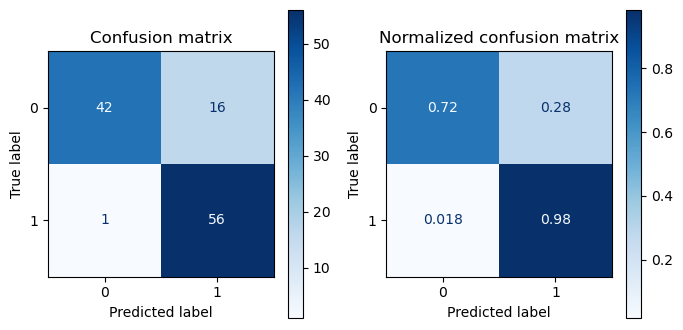

In [74]:
binarizer = Binarizer(threshold=0.5)
custom_prediction = binarizer.fit_transform(logistic_r.predict_proba(X_test)[:, 1].reshape(-1, 1))
get_evaluation_by_custom_proba(y_test, custom_prediction, True)